# Kaggle
## Competition NFL Big Data Bowl

In [61]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Misc lib
import pandasql as ps

# Options
pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

In [68]:
# Carregando os dados de treino
train = pd.read_csv('../data/train.csv')
print ("Data is ready !!")

Data is ready !!


# Data exploration

In [74]:
from IPython.display import Image
Image(url = '../images/NFL_Image_01.png')

In [220]:
# Visualizando os primeiros registros do dataset
train.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [221]:
# Visualizando os tipos das features
train.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [222]:
# Visualizando dados estatisticos das variaveis numericas
train.describe().T

,count,mean,std,min,25%,50%,75%,max
GameId,509762.0,2.017594e+09,4.997098e+05,2.017091e+09,2.017111e+09,2.017123e+09,2.018110e+09,2.018123e+09
PlayId,509762.0,2.017594e+13,4.997098e+09,2.017091e+13,2.017111e+13,2.017123e+13,2.018110e+13,2.018123e+13
X,509762.0,6.004030e+01,2.543526e+01,6.600000e-01,3.909000e+01,6.029000e+01,8.097000e+01,1.168400e+02
Y,509762.0,2.678354e+01,7.238206e+00,1.850000e+00,2.273000e+01,2.679000e+01,3.086000e+01,5.645000e+01
S,509762.0,2.591912e+00,1.383601e+00,0.000000e+00,1.500000e+00,2.470000e+00,3.560000e+00,9.410000e+00
A,509762.0,1.683176e+00,9.764122e-01,0.000000e+00,9.400000e-01,1.540000e+00,2.290000e+00,1.471000e+01
Dis,509762.0,2.794058e-01,1.454822e-01,0.000000e+00,1.700000e-01,2.700000e-01,3.900000e-01,1.390000e+00
Orientation,509744.0,1.802478e+02,1.042983e+02,0.000000e+00,9.063000e+01,1.797000e+02,2.704000e+02,3.600000e+02
Dir,509748.0,1.799339e+02,1.063195e+02,0.000000e+00,8.983000e+01,1.800900e+02,2.701900e+02,3.600000e+02
NflId,509762.0,2.344703e+06,6.418871e+05,2.220000e+02,2.532865e+06,2.543765e+06,2.555343e+06,2.561671e+06


In [223]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [224]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('WindDirection', 15.74),
 ('WindSpeed', 13.23),
 ('Temperature', 9.52),
 ('GameWeather', 8.56),
 ('StadiumType', 6.46),
 ('FieldPosition', 1.26),
 ('Humidity', 1.21),
 ('OffenseFormation', 0.02),
 ('DefendersInTheBox', 0.01),
 ('GameId', 0.0),
 ('PlayId', 0.0),
 ('Team', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('S', 0.0),
 ('A', 0.0),
 ('Dis', 0.0),
 ('Orientation', 0.0),
 ('Dir', 0.0),
 ('NflId', 0.0),
 ('DisplayName', 0.0),
 ('JerseyNumber', 0.0),
 ('Season', 0.0),
 ('YardLine', 0.0),
 ('Quarter', 0.0),
 ('GameClock', 0.0),
 ('PossessionTeam', 0.0),
 ('Down', 0.0),
 ('Distance', 0.0),
 ('HomeScoreBeforePlay', 0.0),
 ('VisitorScoreBeforePlay', 0.0),
 ('NflIdRusher', 0.0),
 ('OffensePersonnel', 0.0),
 ('DefensePersonnel', 0.0),
 ('PlayDirection', 0.0),
 ('TimeHandoff', 0.0),
 ('TimeSnap', 0.0),
 ('Yards', 0.0),
 ('PlayerHeight', 0.0),
 ('PlayerWeight', 0.0),
 ('PlayerBirthDate', 0.0),
 ('PlayerCollegeName', 0.0),
 ('Position', 0.0),
 ('HomeTeamAbbr', 0.0),
 ('VisitorTeamAbbr', 0.0),
 ('Week

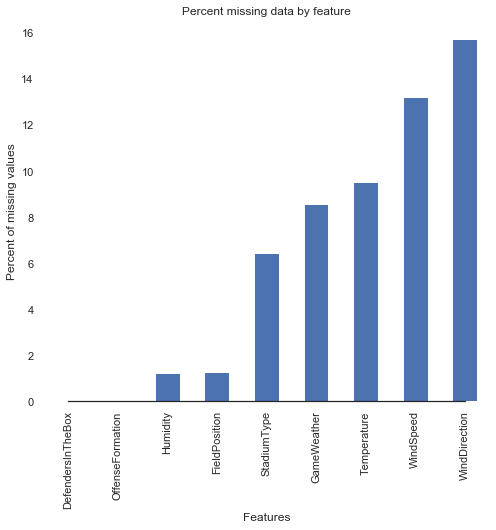

In [225]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

## Analisando Correlacoes

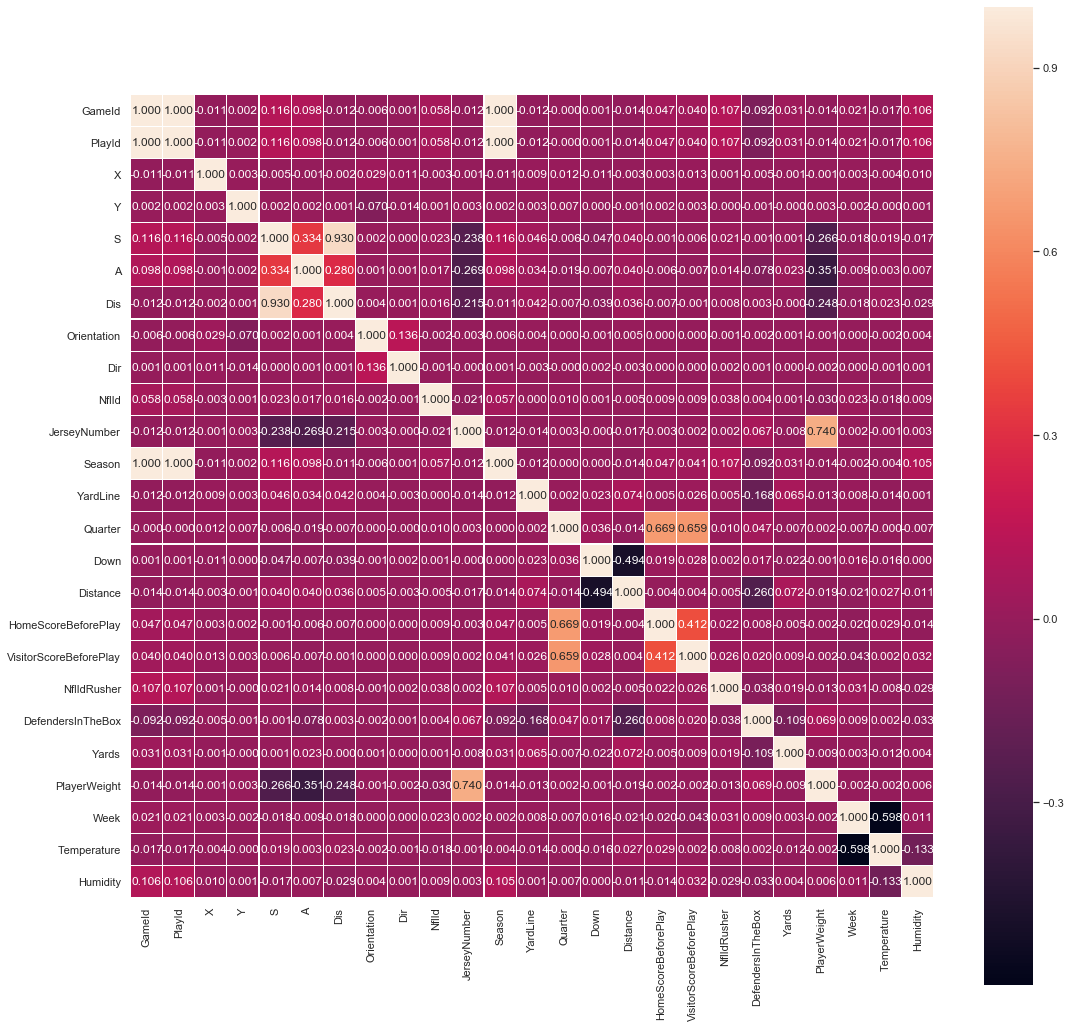

In [226]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=True)

## Analisando a variavel target 'Yards'

In [227]:
# the yardage gained on the play (you are predicting this)
train['Yards'].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

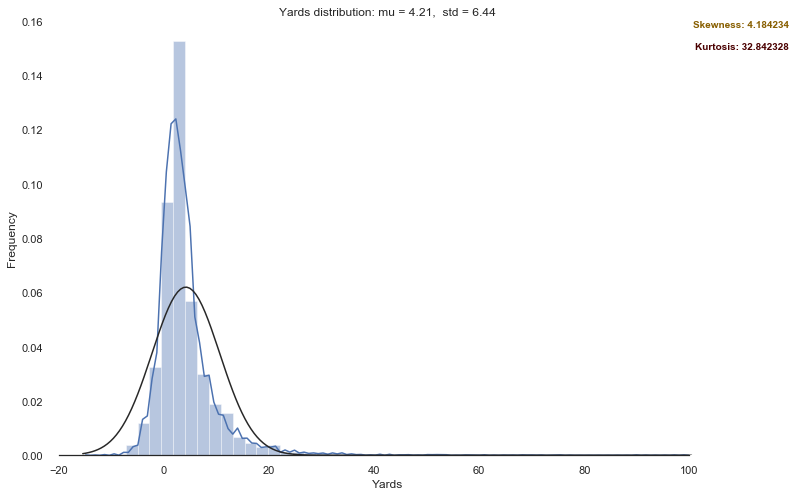

In [228]:
# Analisando a variavel target 'Yards'
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 8))

# Fit a normal distribution
mu, std = norm.fit(train["Yards"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train["Yards"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Yards")
ax.set(title="Yards distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train["Yards"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train["Yards"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

## Analisando as variaveis gerais do JOGO e os relacionamentos com Yards

In [229]:
# year of the season
train['Season'].value_counts()

2017    261800
2018    247962
Name: Season, dtype: int64

Text(0.5, 1, 'Yards por Temporada')

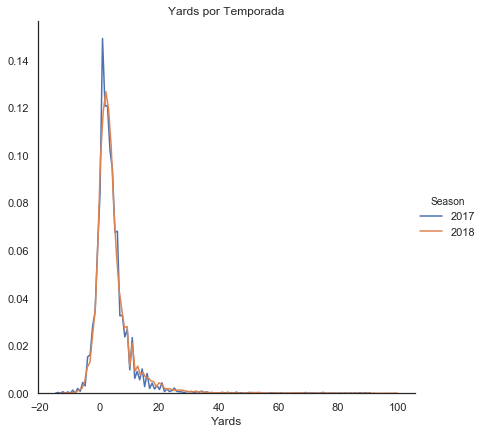

In [230]:
# Verificando a relacao da variavel YARDS com a Temporada
# Aparentemente 2017 e 2018 tem uma mesma distribuicao de Yards
# Uma pequena variacao em 2018 nos picos
sns.FacetGrid(train, hue="Season", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards por Temporada')

In [231]:
# Realizando uma transformacao logaritma na variavel Yards
train["Yards_log"] = np.log1p(train["Yards"])

Text(0.5, 1, 'Yards por Temporada')

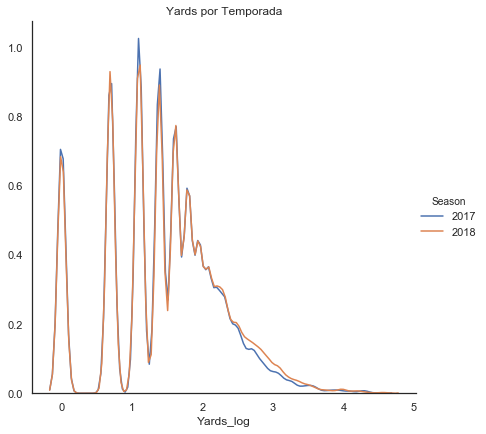

In [232]:
# Verificando a relacao da variavel YARDS (na base logaritima) com a Temporada
# Desta forma conseguimos visualizar uma distribuicao bem parecida de Yards entre as temporadas
sns.FacetGrid(train, hue="Season", height=6) \
   .map(sns.kdeplot, "Yards_log") \
   .add_legend()
plt.title('Yards por Temporada')

In [233]:
# Season tem uma correlação de 1.0 com GameId e PlayId. Exemplo abaixo com 2017 e 2018:
# GameId e PlayId contem o ano e mais algumas informacoes
# Parece ser o mes e o dia e mais um identificador
# Talvez seria necessario deixar a variavel GameId e PlayId somente com o indicador individual
tmp = train.set_index('Season')
print(tmp.loc[[2017], ['GameId','PlayId']].head(1))
print(tmp.loc[[2018], ['GameId','PlayId']].head(1))

            GameId          PlayId
Season                            
2017    2017090700  20170907000118
            GameId          PlayId
Season                            
2018    2018090600  20180906000104


In [234]:
# description of the stadium environment
# Vamos ter que fazer um tratamento nos dados aqui pois tem registros que podem ser agrupados
# Exemplo: Outdoor / Outdoors, Indoor, Indoor, Domed...
train['StadiumType'].value_counts()

Outdoor                   267696
Outdoors                   67474
Indoors                    40854
Dome                       17336
Indoor                     16148
Retractable Roof           15884
Open                        9614
Retr. Roof-Closed           7172
Retr. Roof - Closed         6446
Domed, closed               5918
Domed, open                 2684
Closed Dome                 2134
Dome, closed                1826
Domed                       1826
Oudoor                      1188
Indoor, Roof Closed         1056
Retr. Roof Closed           1056
Retr. Roof-Open              990
Outddors                     968
Bowl                         968
Heinz Field                  902
Outdoor Retr Roof-Open       880
Retr. Roof - Open            880
Outdor                       858
Indoor, Open Roof            858
Ourdoor                      858
Outside                      814
Cloudy                       770
Domed, Open                  770
Name: StadiumType, dtype: int64

Text(0.5, 1, 'Yards por Temporada')

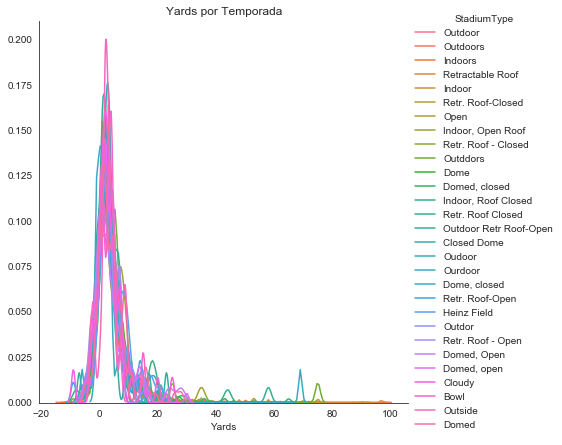

In [157]:
# Verificando a relacao da variavel YARDS com o Tipo de Estadio
# Nao ficou bom o grafico, pois ficou muito poluido
sns.FacetGrid(train, hue="StadiumType", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Tipo de Estadio')

In [69]:
def agrupar_tipo_estadio(StadiumType):
    outdoor       = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
    indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if StadiumType in outdoor:
        return 'outdoor'
    elif StadiumType in indoor_closed:
        return 'indoor_closed'
    elif StadiumType in indoor_open:
        return 'indoor_open'
    elif StadiumType in dome_closed:
        return 'dome_closed'
    elif StadiumType in dome_open:
        return 'dome_open'
    else:
        return 'unknown'

In [70]:
# Executar a funcao para agrupar o nome dos tipos de estadios
train['StadiumType'] = train['StadiumType'].apply(agrupar_tipo_estadio)

In [103]:
# description of the stadium environment
# Agora mais bunitinho, tudo agrupado
train['StadiumType'].value_counts()

outdoor          375342
indoor_closed     88616
dome_closed       29040
indoor_open       12342
dome_open          3454
unknown             968
Name: StadiumType, dtype: int64

In [99]:
# Verificando quais sao os estadios que ficaram com tipo de estadio indefinido
# Sao tres estadios
# Vou dar uma olhada para saber se tem um tipo definido para eles
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE StadiumType = 'unknown'
        GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

,StadiumType,Stadium
0,unknown,TIAA Bank Field


In [98]:
# Para o MetLife Stadium
# Vou tentar encaixar o tipo indefinido
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium IN ('MetLife Stadium', 'StubHub Center', 'TIAA Bank Field')
        GROUP BY StadiumType, Stadium
        ORDER BY Stadium, StadiumType"""
ps.sqldf(q1, locals())

,StadiumType,Stadium
0,outdoor,MetLife Stadium
1,outdoor,StubHub Center
2,indoor_open,TIAA Bank Field
3,outdoor,TIAA Bank Field
4,unknown,TIAA Bank Field


In [93]:
# MetLife Stadium so tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/MetLife_Stadium.jpeg')

In [96]:
# StubHub Center so tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/StubHub_center.jpg')

In [94]:
train.loc[train['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
train.loc[train['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

In [254]:
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium = 'Mercedes-Benz Stadium'
         GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

,StadiumType,Stadium
0,dome_closed,Mercedes-Benz Stadium
1,dome_open,Mercedes-Benz Stadium
2,indoor_closed,Mercedes-Benz Stadium


In [255]:
# Vista do estadio Mercedes_Benz onde da pra jogar de 3 tipos:
# dome_closed
# dome_open
# indoor_closed
from IPython.display import Image
Image(url = '../images/Mercedes_Benz Stadium.jpg')

Text(0.5, 1, 'Yards x Tipo de Estadio')

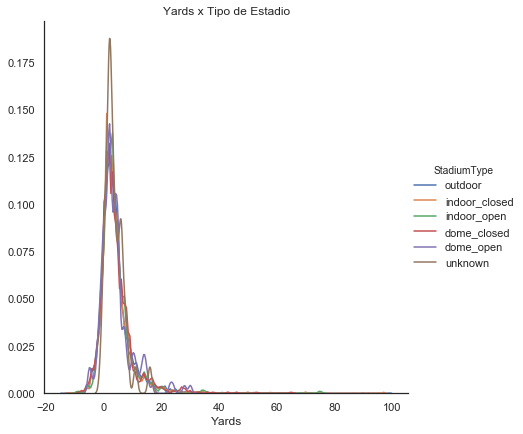

In [100]:
# Verificando a relacao da variavel YARDS com o Tipo de Estadio
# O tipo do estadio nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="StadiumType", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Tipo de Estadio')

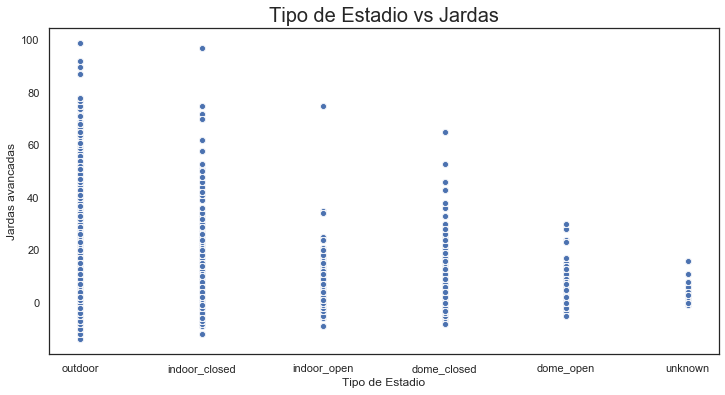

In [101]:
# Exibe o grafico de scatterPlot com a relacao entre tipo estadio e Jardas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='StadiumType', y='Yards', data=train, color='b')
plt.xlabel('Tipo de Estadio')
plt.ylabel('Jardas avancadas')
plt.title('Tipo de Estadio vs Jardas', fontsize=20)
plt.show()

In [102]:
# Esse grafico de Overlapping densities (‘ridge plot’) fica bom
# Mas temos que tratar a feature STADIUMTYPE, pois tem informacoes que 
# precisam ser agrupadas para representar melhor

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparando os dados para o grafico
x = train['Yards']
g = train['StadiumType']
df = pd.DataFrame(dict(x=x, g=g))

# Inicializando o FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=20, palette=pal)

# Desenhando a densidade por steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Colocando o label no grafico
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize=300, color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")
g.fig.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [51]:
# Funcao para agrupar as descricoes dos estadios
def agrupar_estadio(Stadium):

    if Stadium == 'Broncos Stadium at Mile High':
        return 'Broncos Stadium At Mile High'
    
    elif Stadium in ('CenturyField', 'CenturyLink'):
        return 'CenturyLink Field'
    
    elif Stadium == 'EverBank Field':
        return 'Everbank Field'
    
    elif Stadium in ('FirstEnergy', 'FirstEnergy Stadium', 'FirstEnergyStadium'):
        return 'First Energy Stadium'
   
    elif Stadium == 'Lambeau field':
        return 'Lambeau Field'

    elif Stadium == 'Los Angeles Memorial Coliesum':
        return 'Los Angeles Memorial Coliseum'
    
    elif Stadium in ('M & T Bank Stadium', 'M&T Stadium'):
        return 'M&T Bank Stadium'

    elif Stadium == 'Mercedes-Benz Dome':
        return 'Mercedes-Benz SuperDome'
    
    elif Stadium in ('MetLife Stadium', 'Metlife Stadium'):
        return 'MetLife Stadium' 
    
    elif Stadium == 'NRG':
        return 'NRG Stadium' 

    elif Stadium == 'Oakland-Alameda County Coliseum':
        return 'Oakland Alameda-County Coliseum' 
    
    elif Stadium == 'Paul Brown Stdium':
        return 'Paul Brown Stadium' 

    elif Stadium == 'Twickenham':
        return 'Twickenham Stadium' 
    
    else:
        return Stadium

In [52]:
# Executar a funcao de agrupar os nomes dos estadios
train['Stadium'] = train['Stadium'].apply(agrupar_estadio)

In [53]:
# stadium where the game is being played
# Tem alguns registros que da pra unir, por exemplo:
# First Energy Stadium / FirstEnergyStadium / FirstEnergy
# Broncos Stadium At Mile High / Broncos Stadium at Mile High
# CenturyField / CenturyLink

train.groupby(['Stadium','StadiumType']).size()

Stadium                              StadiumType  
AT&T Stadium                         indoor_closed    13640
                                     outdoor           2310
Arrowhead Stadium                    outdoor          15334
Bank of America Stadium              outdoor          14036
Broncos Stadium At Mile High         outdoor           7942
CenturyLink Field                    outdoor          16962
Estadio Azteca                       outdoor            902
Everbank Field                       indoor_open       7678
FedExField                           outdoor          15356
First Energy Stadium                 outdoor          14828
Ford Field                           indoor_closed    15246
Gillette Stadium                     outdoor          17248
Hard Rock Stadium                    outdoor          14564
Heinz Field                          outdoor          14850
Lambeau Field                        outdoor          15312
Levis Stadium                        outdoor     

Text(0.5, 1, 'Yards x Estadio')

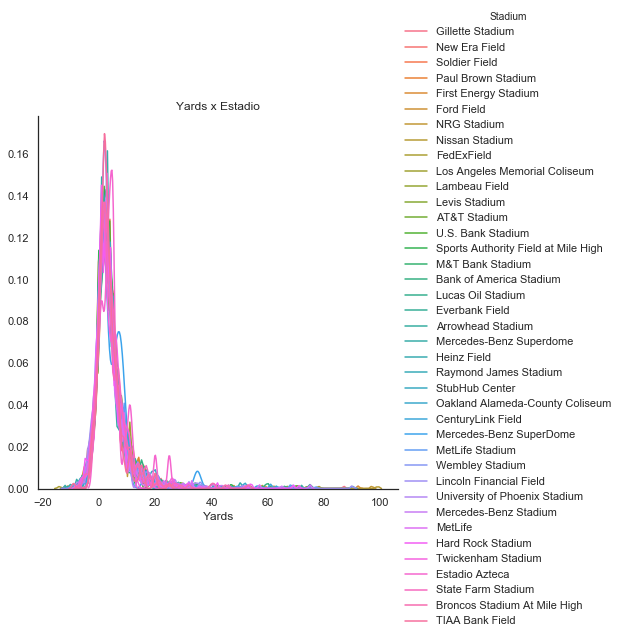

In [55]:
# Verificando a relacao da variavel YARDS com o Tipo de Estadio
# O tipo do estadio nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="Stadium", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Estadio')

In [32]:
# city where the game is being player
# Tem alguns registros que da pra unir... bora la
train.groupby('Location').size()

Location
Arlington, TX          15950
Atlanta, GA            15246
Baltimore, MD          17094
Carson, CA             14630
Charlotte, NC          14036
Chicago, IL            15334
Cincinnati, OH         16588
Cleveland, OH          14828
Denver, CO             16478
Detroit, MI            15246
East Rutherford, NJ    33572
Foxborough, MA         17248
Glendale, AZ           16434
Green Bay, WI          15312
Houston, TX            15884
Indianapolis, Ind.     16544
Jacksonville, FL       14124
Kansas City,  MO        1144
Kansas City, MO        14190
Landover, MD           15356
London, England         6644
Los Angeles, CA        14674
Mexico City              902
Miami Gardens, FLA     14564
Minneapolis, MN        16170
Nashville, TN          15862
New Orleans, LA        15554
Oakland, CA            14564
Orchard Park, NY       17204
Philadelphia, PA       14476
Pittsburgh, PA         14850
Santa Clara, CA        17402
Seattle, WA            16962
Tampa, FL              14696
dtype

In [38]:
# Funcao para agrupar a localizacao do estadio e do jogo
def agrupar_local(Location):

    if Location == "Arlington, Texas":
        return "Arlington, TX"
    elif Location in ("Baltimore, Maryland","Baltimore, Md."):
        return "Baltimore, MD"
    elif Location == "Charlotte, North Carolina":
        return "Charlotte, NC"
    elif Location == "Chicago. IL":
        return "Chicago, IL"
    elif Location == "Cincinnati, Ohio":
        return "Cincinnati, OH"
    elif Location in ("Cleveland","Cleveland Ohio","Cleveland, Ohio","Cleveland,Ohio"):
        return "Cleveland, OH"
    elif Location == "Detroit":
        return "Detroit, MI"
    elif Location == "E. Rutherford, NJ" or Location == "East Rutherford, N.J.":
        return "East Rutherford, NJ"
    elif Location == "Foxborough, Ma":
        return "Foxborough, MA"
    elif Location == "Houston, Texas":
        return "Houston, TX"
    elif Location in ("Jacksonville Florida","Jacksonville, Fl","Jacksonville, Florida"):
        return "Jacksonville, FL"
    elif Location == "London":
        return "London, England"
    elif Location == "Los Angeles, Calif.":
        return "Los Angeles, CA"
    elif Location == "Miami Gardens, Fla.":
        return "Miami Gardens, FLA"
    elif Location in ("New Orleans","New Orleans, La."):
        return "New Orleans, LA"
    elif Location == "Orchard Park NY":
        return "Orchard Park, NY"
    elif Location == "Philadelphia, Pa.":
        return "Philadelphia, PA"
    elif Location == "Pittsburgh":
        return "Pittsburgh, PA"
    elif Location == "Seattle":
        return "Seattle, WA"
    else:
        return Location

In [27]:
# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Location'] = train['Location'].apply(agrupar_local)

In [33]:
# city where the game is being player
train.groupby('Location').size()

Location
Arlington, TX          15950
Atlanta, GA            15246
Baltimore, MD          17094
Carson, CA             14630
Charlotte, NC          14036
Chicago, IL            15334
Cincinnati, OH         16588
Cleveland, OH          14828
Denver, CO             16478
Detroit, MI            15246
East Rutherford, NJ    33572
Foxborough, MA         17248
Glendale, AZ           16434
Green Bay, WI          15312
Houston, TX            15884
Indianapolis, Ind.     16544
Jacksonville, FL       14124
Kansas City,  MO        1144
Kansas City, MO        14190
Landover, MD           15356
London, England         6644
Los Angeles, CA        14674
Mexico City              902
Miami Gardens, FLA     14564
Minneapolis, MN        16170
Nashville, TN          15862
New Orleans, LA        15554
Oakland, CA            14564
Orchard Park, NY       17204
Philadelphia, PA       14476
Pittsburgh, PA         14850
Santa Clara, CA        17402
Seattle, WA            16962
Tampa, FL              14696
dtype

Text(0.5, 1, 'Yards x Location do Estadio')

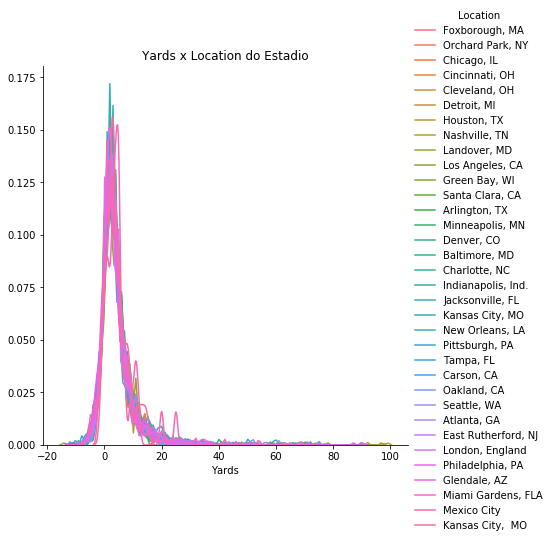

In [36]:
# Verificando a relacao da variavel YARDS com o Localizacao do Estadio
# A localizacao nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="Location", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Location do Estadio')

In [40]:
# Funcao para agrupar o gramado do estadio
def agrupar_gramado(Turf):
    if Turf == 'Artifical':
        return 'Artificial'
    
    elif Turf in ('FieldTurf', 'Field turf'):
        return 'Field Turf'

    elif Turf == 'FieldTurf360':
        return 'FieldTurf 360'

    elif Turf in ('Natural', 'Natural grass', 'Naturall Grass', 'grass', 'natural grass', 'SISGrass'):
        return "Grass"

    elif Turf == "UBU Sports Speed S5-M":
        return "UBU Speed Series-S5-M"

    else:
        return Turf

In [41]:
# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Turf'] = train['Turf'].apply(agrupar_gramado)

In [42]:
# description of the field surface
train.groupby('Turf').size()

Turf
A-Turf Titan               17204
Artificial                 48378
DD GrassMaster              8074
Field Turf                 81862
FieldTurf 360              15246
Grass                     182424
Natural Grass             107096
Twenty-Four/Seven Turf      8030
UBU Speed Series-S5-M      41448
dtype: int64

Text(0.5, 1, 'Yards x Gramado')

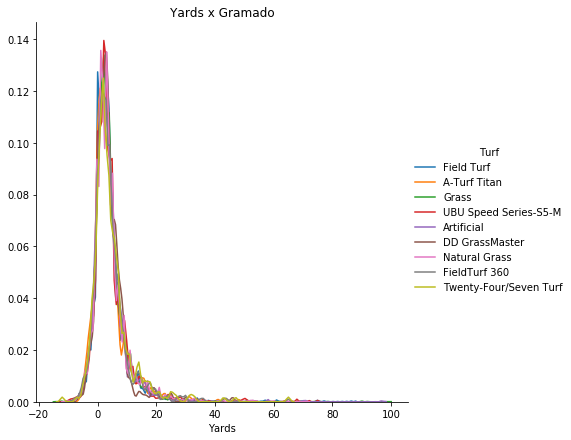

In [44]:
# Verificando a relacao da variavel YARDS com o gramado do estadio
# O gramado tambem nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="Turf", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Gramado')

In [82]:
# a unique game identifier
train['GameId'].value_counts()

2017121000    1870
2017101501    1628
2017100108    1452
2017092100    1386
2017091002    1386
2017110504    1386
2018111807    1386
2018100700    1342
2018123014    1342
2018090901    1342
2018111106    1320
2017121400    1298
2018122308    1276
2017091005    1254
2017100809    1254
2018102500    1254
2018092000    1254
2018100711    1254
2018120207    1254
2017100101    1232
2017123103    1232
2018123015    1232
2017100900    1232
2017100102    1232
2017091711    1232
2018090905    1232
2018093008    1232
2017123107    1232
2018102808    1210
2017100807    1210
              ... 
2018112200     770
2018112509     748
2018102900     748
2018093012     748
2018090910     748
2017091003     726
2017091008     726
2017111600     726
2018093007     726
2018101401     726
2018123009     704
2018120209     704
2018092307     704
2018123003     704
2018091613     704
2018102801     704
2018122310     704
2018111900     682
2018122309     682
2018122313     682
2018091605     682
2018102800  

In [83]:
# a unique play identifier
train['PlayId'].value_counts()

20181007011551    22
20181007090207    22
20171112053416    22
20170918003383    22
20181230140128    22
20170910022384    22
20171001120063    22
20181202132252    22
20171112090950    22
20171002002752    22
20170917041501    22
20170917051736    22
20181213001041    22
20180923012541    22
20181111021012    22
20180930094139    22
20181028023394    22
20171231153278    22
20181007023216    22
20180910011465    22
20170928000166    22
20181008001618    22
20171001102903    22
20181209030691    22
20181014100976    22
20181104072724    22
20181028040809    22
20180923113547    22
20171231100999    22
20181118081196    22
                  ..
20181230152720    22
20180923020355    22
20171210081365    22
20181028052206    22
20181125061862    22
20171203020589    22
20181209081633    22
20171210013306    22
20181129003645    22
20171105092117    22
20181104003980    22
20171106003160    22
20171105020728    22
20180916022072    22
20171126000436    22
20181230144276    22
2017091010237

In [198]:
q1 = """SELECT GameID, PlayID, Team, NflId, DisplayName, Yards
          FROM train
         WHERE PlayID = 20181007011551
           AND Team = 'away'"""
ps.sqldf(q1, locals())

,GameId,PlayId,Team,NflId,DisplayName,Yards
0,2018100701,20181007011551,away,2532875,Janoris Jenkins,14
1,2018100701,20181007011551,away,2535718,Damon Harrison,14
2,2018100701,20181007011551,away,2539338,B.W. Webb,14
3,2018100701,20181007011551,away,2540143,Alec Ogletree,14
4,2018100701,20181007011551,away,2541792,Ray-Ray Armstrong,14
5,2018100701,20181007011551,away,2543738,Kareem Martin,14
6,2018100701,20181007011551,away,2550437,Josh Mauro,14
7,2018100701,20181007011551,away,2552454,Landon Collins,14
8,2018100701,20181007011551,away,2553822,Curtis Riley,14
9,2018100701,20181007011551,away,2555277,Eli Apple,14


In [199]:
q1 = """SELECT GameID, PlayID, Team, NflId, DisplayName, Yards
          FROM train
         WHERE PlayID = 20181007090207
           AND Team = 'away'"""
ps.sqldf(q1, locals())

,GameId,PlayId,Team,NflId,DisplayName,Yards
0,2018100709,20181007090207,away,2495331,Aldrick Robinson,6
1,2018100709,20181007090207,away,2495438,Kyle Rudolph,6
2,2018100709,20181007090207,away,2532816,Tom Compton,6
3,2018100709,20181007090207,away,2532820,Kirk Cousins,6
4,2018100709,20181007090207,away,2533042,Riley Reiff,6
5,2018100709,20181007090207,away,2535607,Mike Remmers,6
6,2018100709,20181007090207,away,2541785,Adam Thielen,6
7,2018100709,20181007090207,away,2555214,Laquon Treadwell,6
8,2018100709,20181007090207,away,2556557,Rashod Hill,6
9,2018100709,20181007090207,away,2558848,Pat Elflein,6


In [210]:
q1 = """SELECT GameID, PlayID, Team, NflId, DisplayName, Yards
          FROM train
         WHERE NflId IN (2495331, 2495438)"""
ps.sqldf(q1, locals())

,GameId,PlayId,Team,NflId,DisplayName,Yards
0,2017091011,20170910111778,home,2495331,Aldrick Robinson,1
1,2017091100,20170911000494,home,2495438,Kyle Rudolph,1
2,2017091100,20170911000624,home,2495438,Kyle Rudolph,-1
3,2017091100,20170911000745,home,2495438,Kyle Rudolph,2
4,2017091100,20170911000963,home,2495438,Kyle Rudolph,6
5,2017091100,20170911000989,home,2495438,Kyle Rudolph,0
6,2017091100,20170911001692,home,2495438,Kyle Rudolph,5
7,2017091100,20170911001771,home,2495438,Kyle Rudolph,10
8,2017091100,20170911002134,home,2495438,Kyle Rudolph,7
9,2017091100,20170911002194,home,2495438,Kyle Rudolph,0


In [204]:
q1 = """SELECT GameID, PlayID, Team, Yards
          FROM train
         GROUP BY GameID, PlayID, Team
         ORDER BY GameID, PlayID"""
ps.sqldf(q1, locals())

,GameId,PlayId,Team,Yards
0,2017090700,20170907000118,away,8
1,2017090700,20170907000118,home,8
2,2017090700,20170907000139,away,3
3,2017090700,20170907000139,home,3
4,2017090700,20170907000189,away,5
5,2017090700,20170907000189,home,5
6,2017090700,20170907000345,away,2
7,2017090700,20170907000345,home,2
8,2017090700,20170907000395,away,7
9,2017090700,20170907000395,home,7


In [84]:
# home or away
train['Team'].value_counts()

away    254881
home    254881
Name: Team, dtype: int64

### Analisando as variaveis do JOGO

In [ ]:
# game quarter (1-5, 5 == overtime)
train['Quarter'].value_counts()

In [ ]:
# time on the game clock
train['GameClock'].value_counts()

In [ ]:
# home team abbreviation 
train['HomeTeamAbbr'].value_counts()

In [ ]:
# home team score before play started
train['HomeScoreBeforePlay'].value_counts()

In [ ]:
# visitor team abbreviation
train['VisitorTeamAbbr'].value_counts()

In [ ]:
# visitor team score before play started
train['VisitorScoreBeforePlay'].value_counts()

In [ ]:
# team with possession
train['PossessionTeam'].value_counts()

In [ ]:
# which side of the field the play is happening on
train['FieldPosition'].value_counts()

### Analisando as variaveis de ACOES no JOGO

In [ ]:
# offensive team positional grouping
train['OffensePersonnel'].value_counts()

In [ ]:
# defensive team positional grouping
train['DefensePersonnel'].value_counts()

In [ ]:
# direction the play is headed
train['PlayDirection'].value_counts()

In [ ]:
# offense formation
train['OffenseFormation'].value_counts()

In [ ]:
# number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
train['DefendersInTheBox'].value_counts()

In [ ]:
# UTC time of the handoff
train['TimeHandoff'].value_counts()

In [ ]:
# UTC time of the snap
train['TimeSnap'].value_counts()

In [ ]:
# yards needed for a first down
# jardas que a equipe precisa para fazer a primeira descida.
train['Distance'].value_counts()

### Analisando as variaveis de TEMPERATURA

In [ ]:
# wind direction
train['WindDirection'].value_counts()

In [ ]:
# wind speed in miles/hour
train['WindSpeed'].value_counts()

In [ ]:
# temperature (deg F)
train['Temperature'].value_counts()

In [ ]:
# description of the game weather
train['GameWeather'].value_counts()

In [ ]:
# humidity
train['Humidity'].value_counts()

### Analisando as variaveis do JOGADOR

In [ ]:
# a unique identifier of the player
train['NflId'].value_counts()

In [ ]:
# the NflId of the rushing player
train['NflIdRusher'].value_counts()

In [ ]:
# player's name
train['DisplayName'].value_counts()

In [ ]:
# player height (ft-in)
train['PlayerHeight'].value_counts()

In [ ]:
# player weight (lbs)
train['PlayerWeight'].value_counts()

In [ ]:
# birth date (mm/dd/yyyy)
train['PlayerBirthDate'].value_counts()

In [ ]:
# where the player attended college
train['PlayerCollegeName'].value_counts()

In [ ]:
# jersey number
# Refere se aos números do uniformes dos jogadores que vai de 1 a 99
# Atacante usam de  50 a 79 e nao tem permissao por exemplo para manipular uma jogada 
# de scrimmage a não ser que reportem ao árbitro que estao jogando fora de posição
train['JerseyNumber'].value_counts()

In [ ]:
# refere-se a posição principal que o jogador joga
train['Position'].value_counts()

### Analisando as variaveis de POSICIONAMENTO DO JOGADOR

In [ ]:
# player position along the long axis of the field. See figure below.
train['X'].value_counts()

In [ ]:
# player position along the short axis of the field. See figure below.
train['Y'].value_counts()

In [ ]:
# speed in yards/second
train['S'].value_counts()

In [ ]:
# acceleration in yards/second^2
train['A'].value_counts()

In [ ]:
# distance traveled from prior time point, in yards
train['Dis'].value_counts()

In [ ]:
# orientation of player (deg)
train['Orientation'].value_counts()

In [ ]:
# angle of player motion (deg)
train['Dir'].value_counts()

In [ ]:
# the yard line of the line of scrimmage
train['YardLine'].value_counts()

### Analisando as variaveis DESCONHECIDAS

In [ ]:
# the down (1-4)
train['Down'].value_counts()